Original shape: (1000, 30)


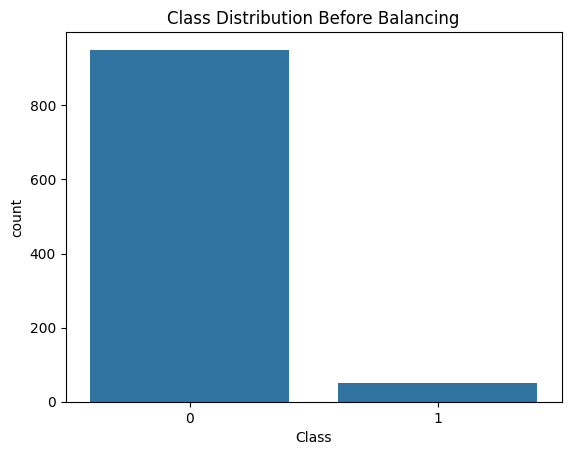

Balanced shape: (100, 30)


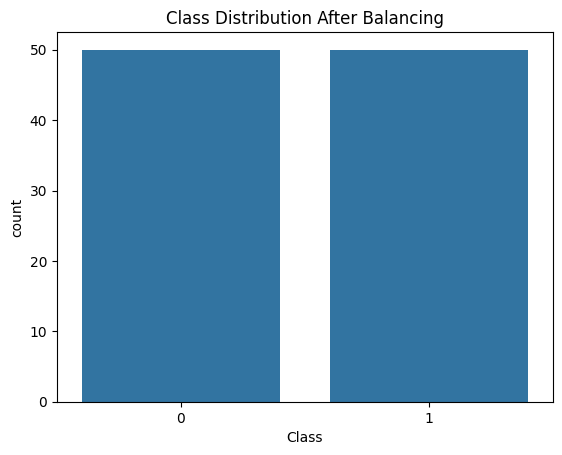

✅ Class distribution is balanced.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import os

# Function to load the dataset
def load_dataset(path='creditcard.csv'):
    try:
        if not os.path.exists(path):
            raise FileNotFoundError(f"File not found: {path}")
        df = pd.read_csv(path)
        if 'Class' not in df.columns:
            raise ValueError("Missing 'Class' column in dataset.")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Function to balance the dataset
def balance_dataset(df):
    try:
        df_majority = df[df['Class'] == 0]
        df_minority = df[df['Class'] == 1]
        
        if len(df_minority) == 0:
            raise ValueError("No minority class samples found (fraud).")
        
        df_majority_downsampled = resample(df_majority,
                                           replace=False,
                                           n_samples=len(df_minority),
                                           random_state=42)
        
        df_balanced = pd.concat([df_majority_downsampled, df_minority])
        df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
        return df_balanced
    except Exception as e:
        print(f"Error balancing dataset: {e}")
        return None

# Unit test function
def test_class_balance(df):
    counts = df['Class'].value_counts()
    assert counts[0] == counts[1], "Dataset not balanced correctly."
    print("✅ Class distribution is balanced.")

# Load dataset
df = load_dataset()

if df is not None:
    print("Original shape:", df.shape)
    sns.countplot(x='Class', data=df)
    plt.title("Class Distribution Before Balancing")
    plt.show()

    df_balanced = balance_dataset(df)

    if df_balanced is not None:
        print("Balanced shape:", df_balanced.shape)
        sns.countplot(x='Class', data=df_balanced)
        plt.title("Class Distribution After Balancing")
        plt.show()
        
        # Run test
        test_class_balance(df_balanced)


In [8]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_nonfraud = 950
n_fraud = 50
n_total = n_nonfraud + n_fraud

# Generate mock features
def generate_features(n):
    return pd.DataFrame({
        f'V{i}': np.random.randn(n) for i in range(1, 29)
    }).assign(Amount=np.random.uniform(1, 500, size=n))

# Generate data
df_nonfraud = generate_features(n_nonfraud)
df_fraud = generate_features(n_fraud)

# Add 'Class' labels
df_nonfraud['Class'] = 0
df_fraud['Class'] = 1

# Combine datasets
df = pd.concat([df_nonfraud, df_fraud], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df.to_csv('creditcard.csv', index=False)

print("Mock creditcard.csv created successfully.")


Mock creditcard.csv created successfully.
